In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set(style='darkgrid', palette='viridis')

In [2]:
mass = np.load('../out/mass.npy',allow_pickle='TRUE').item()

In [3]:
mass['cell_mass']

[1170.3970356705984,
 1170.3970618384808,
 1170.5047408635419,
 1170.6989158678805,
 1170.9660108225012,
 1171.28776353634,
 1171.6552293001928,
 1172.0565110705675,
 1172.4758462831358,
 1172.911238991004,
 1173.3660313734658,
 1173.841228750051,
 1174.3340660336203,
 1174.8431178300482,
 1175.3678559023563,
 1175.9011761245295,
 1176.4412526413955,
 1176.9893037171762,
 1177.5417300573686,
 1178.1000539734157,
 1178.6594155790963,
 1179.21913964237,
 1179.7862533883326,
 1180.3575331193515,
 1180.9363972663928,
 1181.5152869223698,
 1182.0972602837296,
 1182.6797434242433,
 1183.2649631854083,
 1183.850692037525,
 1184.4402147975304,
 1185.0325720413277,
 1185.6304698597176,
 1186.2285033562844,
 1186.825455044999,
 1187.422017632224,
 1188.019348236433,
 1188.613703904378,
 1189.2120960705731,
 1189.8109703231523,
 1190.4091640602742,
 1191.0088385868823,
 1191.608386691472,
 1192.2066809313117,
 1192.8008419134337,
 1193.392477427086,
 1193.9873311587949,
 1194.5850685798064,
 1195

<AxesSubplot:>

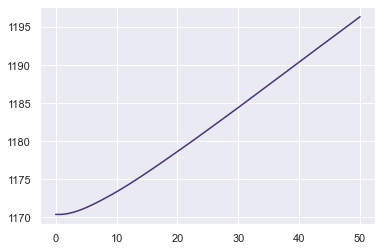

In [4]:
sns.lineplot(x=[i for i in range(len(mass['cell_mass']))],y=mass['cell_mass'])

In [5]:
bulk = np.load('../out/bulk.npy',allow_pickle='TRUE').item()

In [6]:
fba = np.load('../out/fba_results.npy',allow_pickle='TRUE').item()

In [7]:
fba.keys()

dict_keys(['estimated_fluxes', 'estimated_homeostatic_dmdt', 'target_homeostatic_dmdt', 'target_kinetic_fluxes', 'estimated_exchange_dmdt', 'estimated_all_dmdt'])

In [41]:
pd.DataFrame(fba['estimated_fluxes']).head()

,1-ACYLGLYCEROL-3-P-ACYLTRANSFER-RXN,1.1.1.127-RXN,1.1.1.215-RXN (reverse),1.1.1.251-RXN,1.1.1.271-RXN (reverse),1.1.1.274-RXN (reverse),1.1.1.283-RXN (reverse),1.1.1.39-RXN,1.1.1.83-RXN,1.11.1.15-RXN,...,XYLISOM-RXN,XYLISOM-RXN-BETA-D-XYLOSE//D-XYLULOSE.26.,XYLISOM-RXN-CPD-15377//D-XYLULOSE.22.,XYLISOM-RXN-XYLOSE//D-XYLULOSE.19.,XYLONATE-DEHYDRATASE-RXN,XYLULOKIN-RXN,YIAE1-RXN (reverse),YIAE2-RXN (reverse),glycogen-monomer-extension,maintenance_reaction
0,0,0,190841,0,-136809,39574,237424,-815358,0,0,...,-589077,160348,117436,311293,0,0,-209954,151266,-1,1971173
1,14,0,191020,25,-137087,39761,239092,-811464,0,1,...,-589076,160348,117436,311293,0,1,-210239,151258,1,7128364
2,15,0,191158,26,-137128,39891,244759,-809013,0,1,...,-589131,160363,117446,311322,0,0,-210450,151267,3892,7679651
3,19,0,191387,31,-137214,40104,248999,-807463,0,2,...,-589229,160390,117466,311373,0,0,-210800,151283,7019,7652318
4,19,0,191517,33,-137238,40204,252775,-806270,0,2,...,-589363,160426,117493,311444,0,0,-210986,151314,9655,7633153


In [9]:
for a, b in fba['target_kinetic_fluxes'].items():
    if len(b)!=500:
        del fba['target_kinetic_fluxes'][a]

In [10]:
for reaction in fba['target_kinetic_fluxes'].keys():
    for i in range(len(fba['target_kinetic_fluxes'][reaction])):
        print(fba['estimated_fluxes'][reaction][i], fba['target_kinetic_fluxes'][reaction][i])

In [39]:
pd.DataFrame(fba['estimated_exchange_dmdt']).head()

,CL-[p],UREA[p],URACIL[p],OXYGEN-MOLECULE[p],CPD-534[p],FE+2[p],CARBON-MONOXIDE[p],NI+2[p],CPD0-2167[c],WATER[p],...,CH33ADO[c],HYDROGEN-MOLECULE[c],XANTHINE[p],GLC[p],ETOH[p],CPD-10774[p],MG+2[p],INDOLE[p],CPD-239[p],Pi[p]
0,0,394498,-560409,0,68666,0,-1,0,1156838,-2696868,...,-1999397,3984380,848460,-1067029,-862761,296716,0,37772,0,0
1,0,376055,-598487,32,68690,0,-266,0,1173523,-2428120,...,-2040116,4040250,839006,-1053418,-862021,308084,-1,21011,24,-18
2,-153,381706,-572249,6,68698,-4,-230,1,1087633,-3443143,...,-1907356,3815416,782114,-1102959,-894540,285838,-253,52662,26,5
3,-274,385448,-556502,11,68714,-1,-274,3,1019094,-4278920,...,-1800639,3652712,731190,-1138857,-913902,267220,-457,78071,31,5
4,-377,390488,-538941,14,68732,6,-282,7,960263,-4982815,...,-1710278,3501330,692522,-1174158,-935539,251214,-629,99480,33,13


In [40]:
pd.DataFrame(fba['estimated_homeostatic_dmdt']).head()

,2-3-DIHYDROXYBENZOATE[c],2-KETOGLUTARATE[c],2-PG[c],2K-4CH3-PENTANOATE[c],4-AMINO-BUTYRATE[c],4-hydroxybenzoate[c],ACETOACETYL-COA[c],ACETYL-COA[c],ACETYL-P[c],ADENINE[c],...,glycogen-monomer[c],NI+2[p],CO+2[p],FE+2[p],ZN+2[p],MN+2[p],NA+[p],OXYGEN-MOLECULE[p],CA+2[p],Pi[p]
0,0,0,0,0,0,0,0,1,1,1,...,-1,0,0,0,0,0,0,0,0,0
1,0,0,-24,1,1,0,289,-73,-24,0,...,1,0,0,0,0,0,0,32,15,-18
2,8,21,4,7,17,4,-4,58,61,1,...,3892,1,4,-4,1,-3,4,6,-44,5
3,15,38,5,15,33,5,-11,98,109,1,...,7019,3,7,-1,3,-2,9,11,-66,5
4,20,51,11,20,44,8,-3,149,155,-1,...,9655,7,11,6,6,0,13,14,-71,13


# Meeting homeostatic objective

In [13]:
df1 = pd.DataFrame(fba['estimated_homeostatic_dmdt'])
df1 = df1.transpose().reset_index().melt(id_vars='index', var_name='timestep', value_name='update')
df1

,index,timestep,update
0,2-3-DIHYDROXYBENZOATE[c],0,0
1,2-KETOGLUTARATE[c],0,0
2,2-PG[c],0,0
3,2K-4CH3-PENTANOATE[c],0,0
4,4-AMINO-BUTYRATE[c],0,0
...,...,...,...
8545,MN+2[p],49,32
8546,NA+[p],49,33
8547,OXYGEN-MOLECULE[p],49,32
8548,CA+2[p],49,33


In [14]:
pd.DataFrame(fba['target_homeostatic_dmdt'])

,2-3-DIHYDROXYBENZOATE[c],2-KETOGLUTARATE[c],2-PG[c],2K-4CH3-PENTANOATE[c],4-AMINO-BUTYRATE[c],4-hydroxybenzoate[c],ACETOACETYL-COA[c],ACETYL-COA[c],ACETYL-P[c],ADENINE[c],...,glycogen-monomer[c],NI+2[p],CO+2[p],FE+2[p],ZN+2[p],MN+2[p],NA+[p],OXYGEN-MOLECULE[p],CA+2[p],Pi[p]
0,0,0,0,0,0,0,0,0,0,0,...,-2,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,361,-1,-1,-1,...,0,0,0,0,0,0,0,32,22,6
2,8,21,29,7,17,3,73,135,87,1,...,3891,6,6,6,6,6,6,5,13,30
3,14,37,35,14,32,4,81,189,139,0,...,7019,15,12,20,15,19,12,10,66,35
4,20,51,43,20,43,7,94,246,187,-1,...,9655,27,20,36,27,36,18,14,148,45
5,24,62,48,24,53,8,103,283,220,2,...,11630,38,27,48,39,54,23,17,237,50
6,28,71,54,28,60,10,111,319,250,1,...,13283,49,33,57,50,70,28,21,323,55
7,30,77,56,30,66,11,115,342,272,2,...,14505,59,38,66,60,85,31,21,405,58
8,32,80,61,32,69,11,126,363,285,2,...,15158,67,42,71,68,97,33,24,474,64
9,33,84,56,33,72,12,108,357,289,0,...,15738,73,45,74,74,107,35,23,529,59


In [15]:
df2 = pd.DataFrame(fba['target_homeostatic_dmdt'])
df2 = df2.transpose().reset_index().melt(id_vars='index', var_name='timestep', value_name='target')
df2

,index,timestep,target
0,2-3-DIHYDROXYBENZOATE[c],0,0
1,2-KETOGLUTARATE[c],0,0
2,2-PG[c],0,0
3,2K-4CH3-PENTANOATE[c],0,0
4,4-AMINO-BUTYRATE[c],0,0
...,...,...,...
8545,MN+2[p],49,176
8546,NA+[p],49,49
8547,OXYGEN-MOLECULE[p],49,32
8548,CA+2[p],49,905


In [16]:
df3 = df1.merge(df2, left_on=['index', 'timestep'], right_on=['index', 'timestep'])
df3

,index,timestep,update,target
0,2-3-DIHYDROXYBENZOATE[c],0,0,0
1,2-KETOGLUTARATE[c],0,0,0
2,2-PG[c],0,0,0
3,2K-4CH3-PENTANOATE[c],0,0,0
4,4-AMINO-BUTYRATE[c],0,0,0
...,...,...,...,...
8545,MN+2[p],49,32,176
8546,NA+[p],49,33,49
8547,OXYGEN-MOLECULE[p],49,32,32
8548,CA+2[p],49,33,905


In [17]:
df3['update'] = df3['update'].abs() 
df3['target'] = df3['target'].abs() 

df3['update'] = np.log10(df3['update'])
df3['target'] = np.log10(df3['target'])

df3

/Users/cyrus/.pyenv/versions/3.9.9/envs/viv/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,index,timestep,update,target
0,2-3-DIHYDROXYBENZOATE[c],0,-inf,-inf
1,2-KETOGLUTARATE[c],0,-inf,-inf
2,2-PG[c],0,-inf,-inf
3,2K-4CH3-PENTANOATE[c],0,-inf,-inf
4,4-AMINO-BUTYRATE[c],0,-inf,-inf
...,...,...,...,...
8545,MN+2[p],49,1.505150,2.245513
8546,NA+[p],49,1.518514,1.690196
8547,OXYGEN-MOLECULE[p],49,1.505150,1.505150
8548,CA+2[p],49,1.518514,2.956649


In [18]:
df3_subset = df3[df3['timestep'].isin([0, 1, 2, 49])]

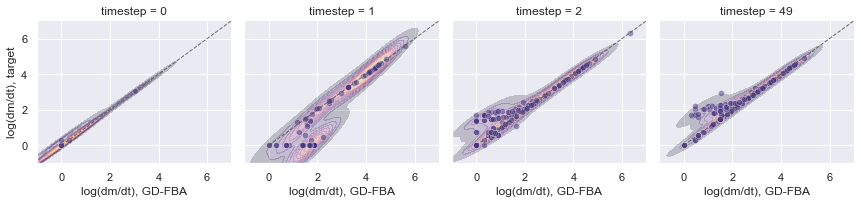

In [22]:
g = sns.FacetGrid(df3_subset, col="timestep", col_wrap=5, aspect=1, xlim=(-1,7), ylim=(-1,7))
g.map(sns.kdeplot, "update", "target", cmap="inferno", alpha=0.2, fill=True)
g.map(sns.scatterplot, "update", "target", alpha=0.5)
g.set_axis_labels("log(dm/dt), GD-FBA","log(dm/dt), target")

for ax in g.axes:
    ax.plot([0, 9], [0, 9], linewidth=1,  linestyle='--', color='.3', alpha=0.8)
    

plt.margins(0,0)

# Flux targets

# Bulk

In [54]:
bulk.keys()

dict_keys(['CPLX-125[c]', 'CPLX-172[c]', 'CPLX0-226[c]', 'CPLX0-228[c]', 'CPLX0-7669[c]', 'CPLX0-7705[c]', 'CPLX0-7740[c]', 'CPLX0-7796[c]', 'CPLX0-7916[c]', 'EG12123-MONOMER[c]', 'FNR-4FE-4S-CPLX[c]', 'MONOMER0-155[c]', 'MONOMER0-160[c]', 'MONOMER0-162[c]', 'PC00010[c]', 'PC00027[c]', 'PD00288[c]', 'PD00519[c]', 'PHOSPHO-ARCA[c]', 'PHOSPHO-BAER[c]', 'PHOSPHO-BASR[c]', 'PHOSPHO-DCUR[c]', 'PHOSPHO-NARL[c]', 'PUTA-CPLX[c]', 'PC00007[c]', 'PC00003[c]', 'PC00004[c]', 'PC00005[c]', 'CPLX0-7670[c]', 'CPLX0-8051[c]', 'CPLX0-7796APO[c]', 'CPLX0-7797[c]', 'PD00353[c]', 'PD03831[c]', 'PD00413[c]', 'ARCA-MONOMER[c]', 'BAER-MONOMER[c]', 'BASR-MONOMER[c]', 'DCUR-MONOMER[c]', 'NARL-MONOMER[c]', 'PUTA-CPLXBND[c]', 'APORNAP-CPLX[c]', 'GUANOSINE-5DP-3DP[c]', 'EG10001_RNA[c]', 'EG10002_RNA[c]', 'EG10003_RNA[c]', 'EG10004_RNA[c]', 'EG10006_RNA[c]', 'EG10007_RNA[c]', 'EG10008_RNA[c]', 'EG10010_RNA[c]', 'EG10011_RNA[c]', 'EG10012_RNA[c]', 'EG10013_RNA[c]', 'EG10014_RNA[c]', 'EG10015_RNA[c]', 'EG10016_RNA[c

In [48]:
metabolites = fba['estimated_all_dmdt'].keys()

In [49]:
counts = {key: bulk[key] for key in metabolites}

KeyError: 'ACYL-SN-GLYCEROL-3P[c]'

# Glucose transport

In [23]:
fluxes = pd.DataFrame(fba['estimated_fluxes'])

In [24]:
fluxes.head()

,1-ACYLGLYCEROL-3-P-ACYLTRANSFER-RXN,1.1.1.127-RXN,1.1.1.215-RXN (reverse),1.1.1.251-RXN,1.1.1.271-RXN (reverse),1.1.1.274-RXN (reverse),1.1.1.283-RXN (reverse),1.1.1.39-RXN,1.1.1.83-RXN,1.11.1.15-RXN,...,XYLISOM-RXN,XYLISOM-RXN-BETA-D-XYLOSE//D-XYLULOSE.26.,XYLISOM-RXN-CPD-15377//D-XYLULOSE.22.,XYLISOM-RXN-XYLOSE//D-XYLULOSE.19.,XYLONATE-DEHYDRATASE-RXN,XYLULOKIN-RXN,YIAE1-RXN (reverse),YIAE2-RXN (reverse),glycogen-monomer-extension,maintenance_reaction
0,0,0,190841,0,-136809,39574,237424,-815358,0,0,...,-589077,160348,117436,311293,0,0,-209954,151266,-1,1971173
1,14,0,191020,25,-137087,39761,239092,-811464,0,1,...,-589076,160348,117436,311293,0,1,-210239,151258,1,7128364
2,15,0,191158,26,-137128,39891,244759,-809013,0,1,...,-589131,160363,117446,311322,0,0,-210450,151267,3892,7679651
3,19,0,191387,31,-137214,40104,248999,-807463,0,2,...,-589229,160390,117466,311373,0,0,-210800,151283,7019,7652318
4,19,0,191517,33,-137238,40204,252775,-806270,0,2,...,-589363,160426,117493,311444,0,0,-210986,151314,9655,7633153


## Get top fluxes

In [38]:
top_fluxes = list(fluxes.sort_values(axis=1, by=49, ascending=False).columns[0:50])
top_fluxes

['maintenance_reaction',
 'RXN-21817-CPD-9956/PROTON/OXYGEN-MOLECULE//UBIQUINONE-8/PROTON/WATER.59.',
 'NADH-DEHYDROG-A-RXN-NADH/UBIQUINONE-8/PROTON//NAD/CPD-9956/PROTON.46.',
 'TRANS-RXN-145',
 'ATPSYN-RXN',
 '6PGLUCONOLACT-RXN',
 'RXN0-7235-ETF-Reduced/UBIQUINONE-8//ETF-Oxidized/CPD-9956/PROTON.55.',
 'RXN0-5266-CPD-9956/OXYGEN-MOLECULE/PROTON//UBIQUINONE-8/WATER/PROTON.59.',
 'PGLYCDEHYDROG-RXN',
 'FORMATEDEHYDROG-RXN-FORMATE/CPD-9728/PROTON//CARBON-DIOXIDE/REDUCED-MENAQUINONE/PROTON.67.__FORMATEDEHYDROGN-CPLX',
 'ALANINE-AMINOTRANSFERASE-RXN',
 'RXN0-7209-CPD0-1123//CPD0-1123.21.',
 'RXN-14806-CPD-12047//CPD-15700.21.',
 'RXN0-6542',
 'TRANS-RXN-132',
 'TRANS-RXN-380-CEPHALOSPORIN-C//CEPHALOSPORIN-C.33.',
 'RXN0-7245-CEPHALOSPORIN-C//CEPHALOSPORIN-C.33.',
 'TRANS-RXN0-574-Glucopyranose//Glucopyranose.29.',
 'TRANS-RXN0-265-PRO//PRO.9.',
 'TRANS-RXN0-265-GLY//GLY.9.',
 'RXN0-5388-CPD-9728/NADH/PROTON//REDUCED-MENAQUINONE/NAD/PROTON.53.',
 'TRANS-RXN0-468-THYMIDINE//THYMIDINE.21.',
 

In [36]:
df3[df3['index'].isin(top_fluxes)]

,index,timestep,update,target


# Check target goal

In [27]:
fba['estimated_fluxes']['maintenance_reaction']

[1971173,
 7128364,
 7679651,
 7652318,
 7633153,
 7569393,
 7553688,
 7551546,
 7576320,
 7604467,
 7552944,
 7570342,
 7604211,
 7585577,
 7598441,
 7589762,
 7592844,
 7587003,
 7548966,
 7590601,
 7608486,
 7580276,
 7603010,
 7661201,
 7663112,
 7648921,
 7652208,
 7641212,
 7672228,
 7657047,
 7647862,
 7668513,
 7668327,
 7657195,
 7658779,
 7679300,
 7682653,
 7669406,
 7683165,
 7681571,
 7681299,
 7694913,
 7670490,
 7679206,
 7697897,
 7739146,
 7734271,
 7725220,
 7698093,
 7722605]

In [28]:
fba['target_kinetic_fluxes']['maintenance_reaction']

KeyError: 'maintenance_reaction'

In [29]:
df1 = pd.DataFrame(gd_d['estimated_dmdt'])
df1

NameError: name 'gd_d' is not defined